#### Import Train and Test Dataset from Project 1

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train =  pd.read_csv("X_train.csv")
y_train =  pd.read_csv("Y_train.csv")
X_test  =  pd.read_csv("X_test.csv")
y_test  =  pd.read_csv("Y_test.csv")

#### Check Linearity of Train Dataset using PCA



In [ ]:
from sklearn.decomposition import PCA

# Choose the number of components (let's say 2 for demonstration)
n_components = 2

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)

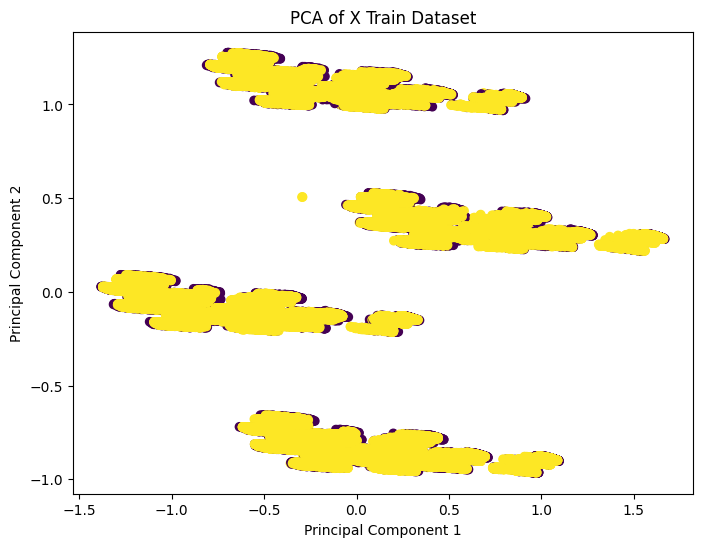

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],  c=y_train.values, cmap='viridis')
plt.title('PCA of X Train Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# The PCA can beused to understand linearity of data through dimensionality reduction
# Since the data points form distinct clusters in the reduced-dimensional space, Training Set data may have linear characteristics

# Thus we can utilize following Machine Learning Binary Classifiers(as Target Variable is 0 or 1):
# 'DecisionTree': DecisionTreeClassifier(),
# 'RandomForest': RandomForestClassifier(),
# 'GradientBoosting': GradientBoostingClassifier(),
# 'XGBoost': XGBClassifier(),
# 'LightGBM': LGBMClassifier(),
# 'LogisticRegression': LogisticRegression(),
# 'Ridge': RidgeClassifier(),
# 'Lasso': Lasso(),
# 'SVM': SVC(probability=True)
# 'KNeighbors': KNeighborsClassifier(),
# 'NaiveBayes': GaussianNB()

#### Machine Learning Classifier Model Pipeline

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np

# Define classifiers
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'LogisticRegression': LogisticRegression(),
    'Ridge': RidgeClassifier(),
    'Lasso': Lasso(),
    'SVM': SVC(probability=True),
    'KNeighbors': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB()
}

# Create KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics (F1 score and ROC AUC)
scorers = {
    'F1': make_scorer(f1_score),
    'ROC_AUC': make_scorer(roc_auc_score)
}

# Dictionary to store average scores
avg_scores = {metric: {} for metric in scorers}

# Iterate through classifiers
for clf_name, clf in classifiers.items():
    X_train_array = X_train.values
    y_train_array = y_train.values

    # Perform cross-validation for each metric
    for metric, scorer in scorers.items():
        scores = cross_val_score(clf, X_train_array, y_train_array, cv=kf, scoring=scorer)
        avg_scores[metric][clf_name] = scores.mean()

        # Print cross-validation scores
        print(f"\nCross Validation Scores for {clf_name} ({metric}): {scores}")
        print(f"Average Cross Validation {metric} for {clf_name}: {scores.mean()}")

    # ROC Curve analysis
    if 'ROC_AUC' in scorers:
        # Compute ROC curve and ROC AUC for each fold
        tpr_list = []
        mean_fpr = np.linspace(0, 1, 100)
        for train_idx, test_idx in kf.split(X_train_array):
            probas_ = clf.fit(X_train_array[train_idx], y_train_array[train_idx]).predict_proba(X_train_array[test_idx])
            fpr, tpr, thresholds = roc_curve(y_train_array[test_idx], probas_[:, 1])
            tpr_list.append(np.interp(mean_fpr, fpr, tpr))

        # Calculate mean and standard deviation of ROC AUC
        mean_tpr = np.mean(tpr_list, axis=0)
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(tpr_list, axis=0)

        # Plot the ROC curve
        plt.figure()
        plt.plot(mean_fpr, mean_tpr, color='b')#, label=f'Mean ROC (AUC = {mean_auc:.2f} +/- {std_auc:.2f})')
        plt.fill_between(mean_fpr, mean_tpr - std_auc, mean_tpr + std_auc, color='grey', alpha=0.2,
                         label='Mean $\pm$ 1 std. dev.')
        plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {clf_name}')
        plt.legend(loc='lower right')
        plt.show()

# Identify the classifier with the highest average ROC AUC score
best_classifier_roc_auc = max(avg_scores['ROC_AUC'], key=avg_scores['ROC_AUC'].get)
print(f"\nThe best classifier with respect to ROC AUC is: {best_classifier_roc_auc} ({avg_scores['ROC_AUC'][best_classifier_roc_auc]})")

# Identify the classifier with the highest average F1 score
best_classifier_f1 = max(avg_scores['F1'], key=avg_scores['F1'].get)
print(f"The best classifier with respect to F1 score is: {best_classifier_f1} ({avg_scores['F1'][best_classifier_f1]})")


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with appropriate settings
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred_binary)
print(f"F1 Score on Test Set: {f1}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


Epoch 1/10
14642/14642 [==============================] - 40s 3ms/step - loss: 0.5021 - accuracy: 0.7701
Epoch 2/10
14642/14642 [==============================] - 38s 3ms/step - loss: 0.4884 - accuracy: 0.7790
Epoch 3/10
14642/14642 [==============================] - 34s 2ms/step - loss: 0.4841 - accuracy: 0.7816
Epoch 4/10
14642/14642 [==============================] - 34s 2ms/step - loss: 0.4824 - accuracy: 0.7825
Epoch 5/10
14642/14642 [==============================] - 38s 3ms/step - loss: 0.4813 - accuracy: 0.7830
Epoch 6/10
14642/14642 [==============================] - 33s 2ms/step - loss: 0.4800 - accuracy: 0.7842
Epoch 7/10
14642/14642 [==============================] - 34s 2ms/step - loss: 0.4789 - accuracy: 0.7842
Epoch 8/10
14642/14642 [==============================] - 34s 2ms/step - loss: 0.4780 - accuracy: 0.7849
Epoch 9/10
14642/14642 [==============================] - 38s 3ms/step - loss: 0.4769 - accuracy: 0.7855
Epoch 10/10
2194/2194 [==============================] 

#### Running DT, XGB Model, RF and LightGBM Model on Test Set


Evaluation Metrics for DecisionTree:
{'Precision': 0.3800451045960028, 'Recall': 0.4167306216423638, 'F1 Score': 0.39754331733506876, 'ROC AUC': 0.6401423131647008}


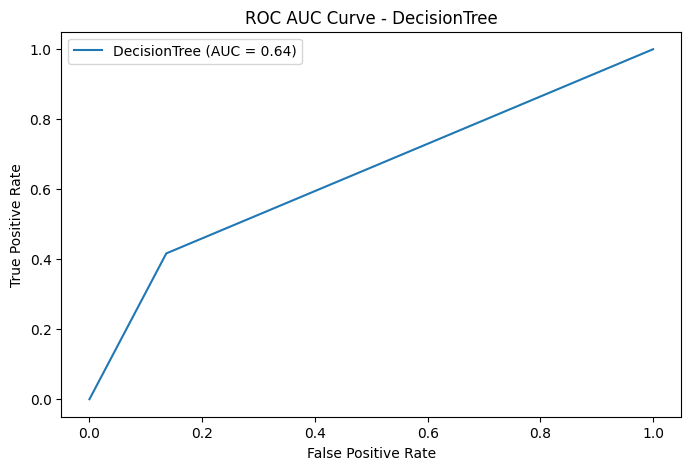


Evaluation Metrics for RandomForest:
{'Precision': 0.4862413528055342, 'Recall': 0.5394389016798841, 'F1 Score': 0.5114605651453289, 'ROC AUC': 0.8115307958494723}


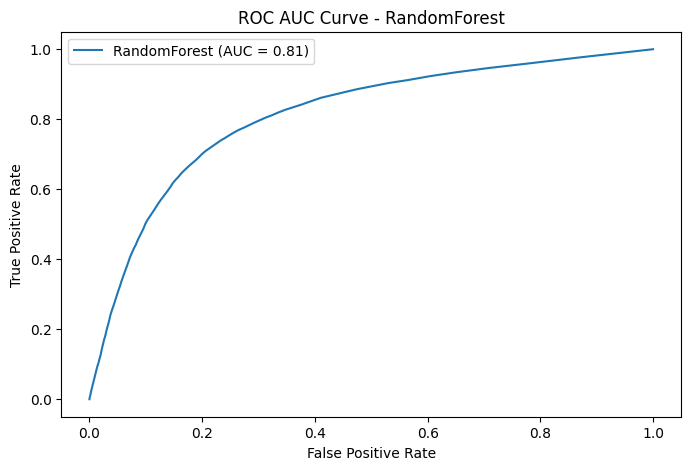


Evaluation Metrics for XGBoost:
{'Precision': 0.5644894204231831, 'Recall': 0.523236974503283, 'F1 Score': 0.5430809399477806, 'ROC AUC': 0.834100846992762}


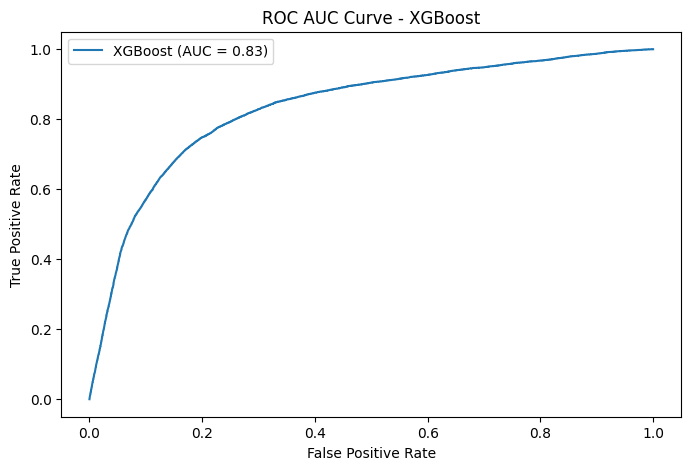

[LightGBM] [Info] Number of positive: 234268, number of negative: 234268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1804
[LightGBM] [Info] Number of data points in the train set: 468536, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Evaluation Metrics for LightGBM:
{'Precision': 0.5972295099170952, 'Recall': 0.4852903555896649, 'F1 Score': 0.5354723372224313, 'ROC AUC': 0.8365184437170703}


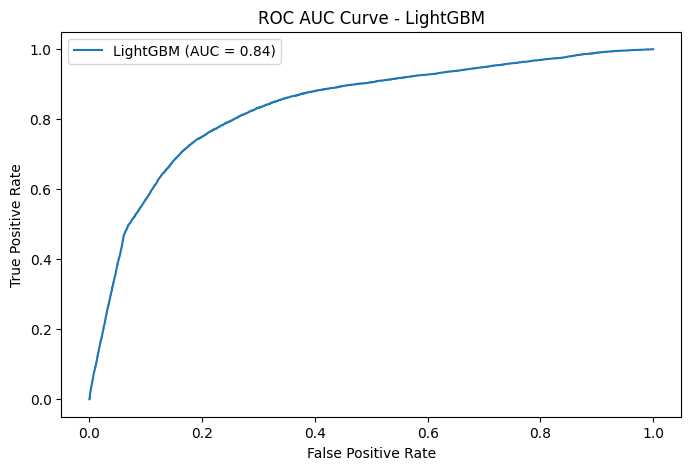


The best classifier with respect to F1 score is: XGBoost ({'Precision': 0.5644894204231831, 'Recall': 0.523236974503283, 'F1 Score': 0.5430809399477806, 'ROC AUC': 0.834100846992762})


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier()
}

# Create dictionary to store evaluation metrics for each model
eval_metrics = {}

# Iterate through classifiers
for clf_name, clf in classifiers.items():
    X_train_array = X_train.values
    y_train_array = y_train.values

    # Train the model
    clf.fit(X_train_array, y_train_array)

    # Make predictions on the test set
    y_pred_test = clf.predict(X_test)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

    # Store evaluation metrics
    eval_metrics[clf_name] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

    # Print evaluation metrics for each model
    print(f"\nEvaluation Metrics for {clf_name}:\n{eval_metrics[clf_name]}")

    # Plot ROC AUC curve for each model
    plt.figure(figsize=(8, 5))
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {eval_metrics[clf_name]["ROC AUC"]:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC Curve - {clf_name}')
    plt.legend()
    plt.show()

# Identify the best classifier based on F1 score
best_classifier = max(eval_metrics, key=lambda k: eval_metrics[k]['F1 Score'])

# Print results of the best classifier
print(f"\nThe best classifier with respect to F1 score is: {best_classifier} ({eval_metrics[best_classifier]})")


#### Grid Search to optimize LightGBM model

[LightGBM] [Info] Number of positive: 187414, number of negative: 187414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 374828, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 187415, number of negative: 187414
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024337 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1803
[LightGBM] [Info] Number of data points in the train set: 374829, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500001 -> initsco

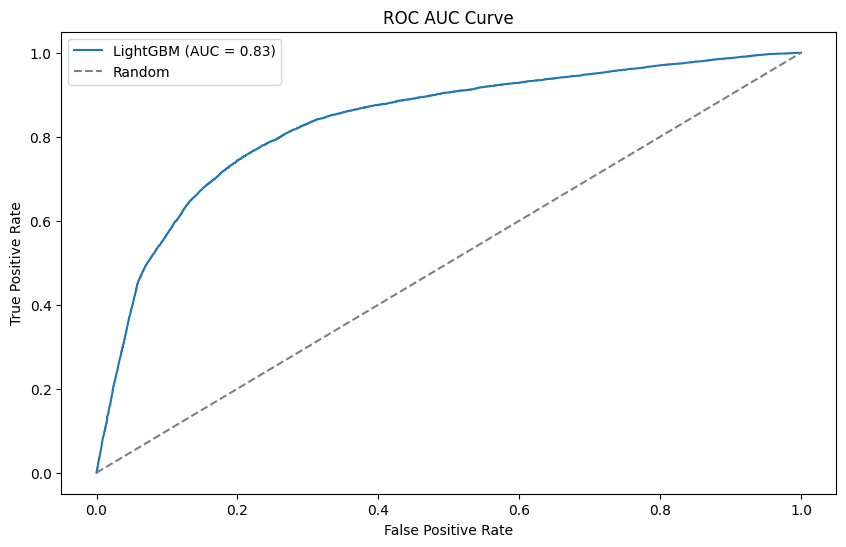

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define LightGBM classifier
clf = LGBMClassifier()

# Define hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [10, 100],
    'max_depth': [3, 7]
}

# Create GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, scoring='f1', cv=5)

# Train the model with grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Store evaluation metrics
eval_metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

# Print evaluation metrics
print(f"\nEvaluation Metrics for LightGBM with Best Hyperparameters:\n{eval_metrics}")

# Plot ROC AUC curve
plt.figure(figsize=(10, 6))
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {eval_metrics["ROC AUC"]:.2f})')

plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()


#### Feature Importance

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 234268, number of negative: 234268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1804
[LightGBM] [Info] Number of data points in the train set: 468536, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


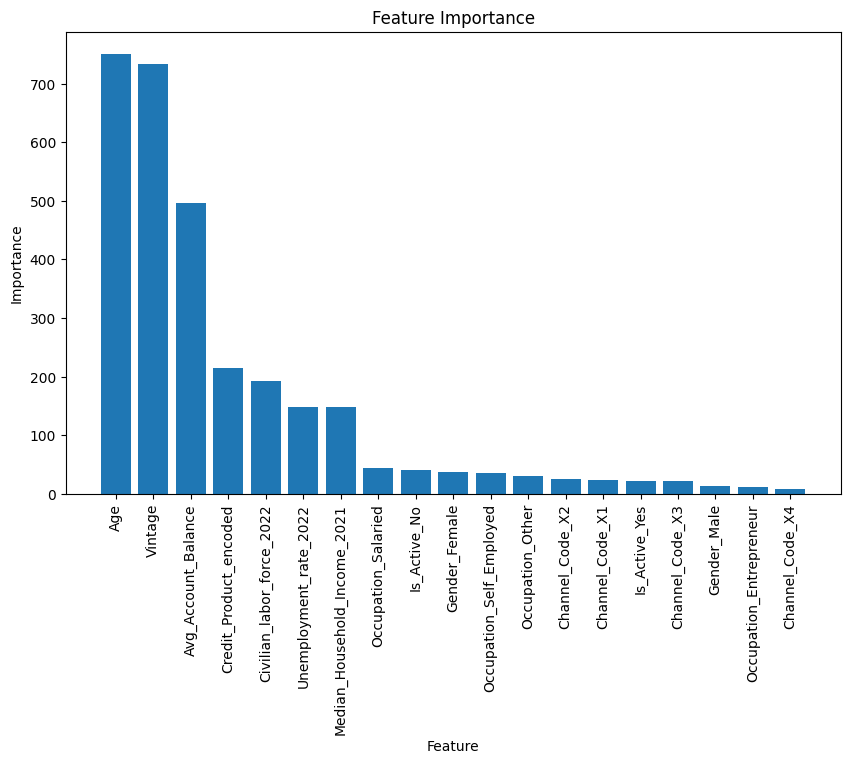

In [ ]:
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Create LightGBM classifier with specific hyperparameters
clf = LGBMClassifier(learning_rate=0.7, n_estimators=100, max_depth=7)

# Train the model
clf.fit(X_train, y_train)

# Get feature importances
feature_importance = clf.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = feature_importance.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
